In [1]:
from qiskit import QuantumCircuit,  QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.visualization import *
from qiskit.circuit.library import QFT, MCMT, XGate
from numpy import pi
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
import numpy as np

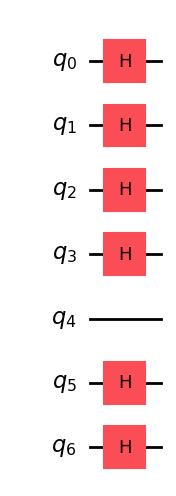

In [2]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

n = 7
circuit = QuantumCircuit(n)

for qubit in [0, 1, 2, 3, 5, 6]:
    circuit.h(qubit)

circuit.draw('mpl')

In [3]:
num_steps = int(np.round((3 * np.pi / 2) * np.sqrt(2 ** (4 - 1))))
print(num_steps)

13


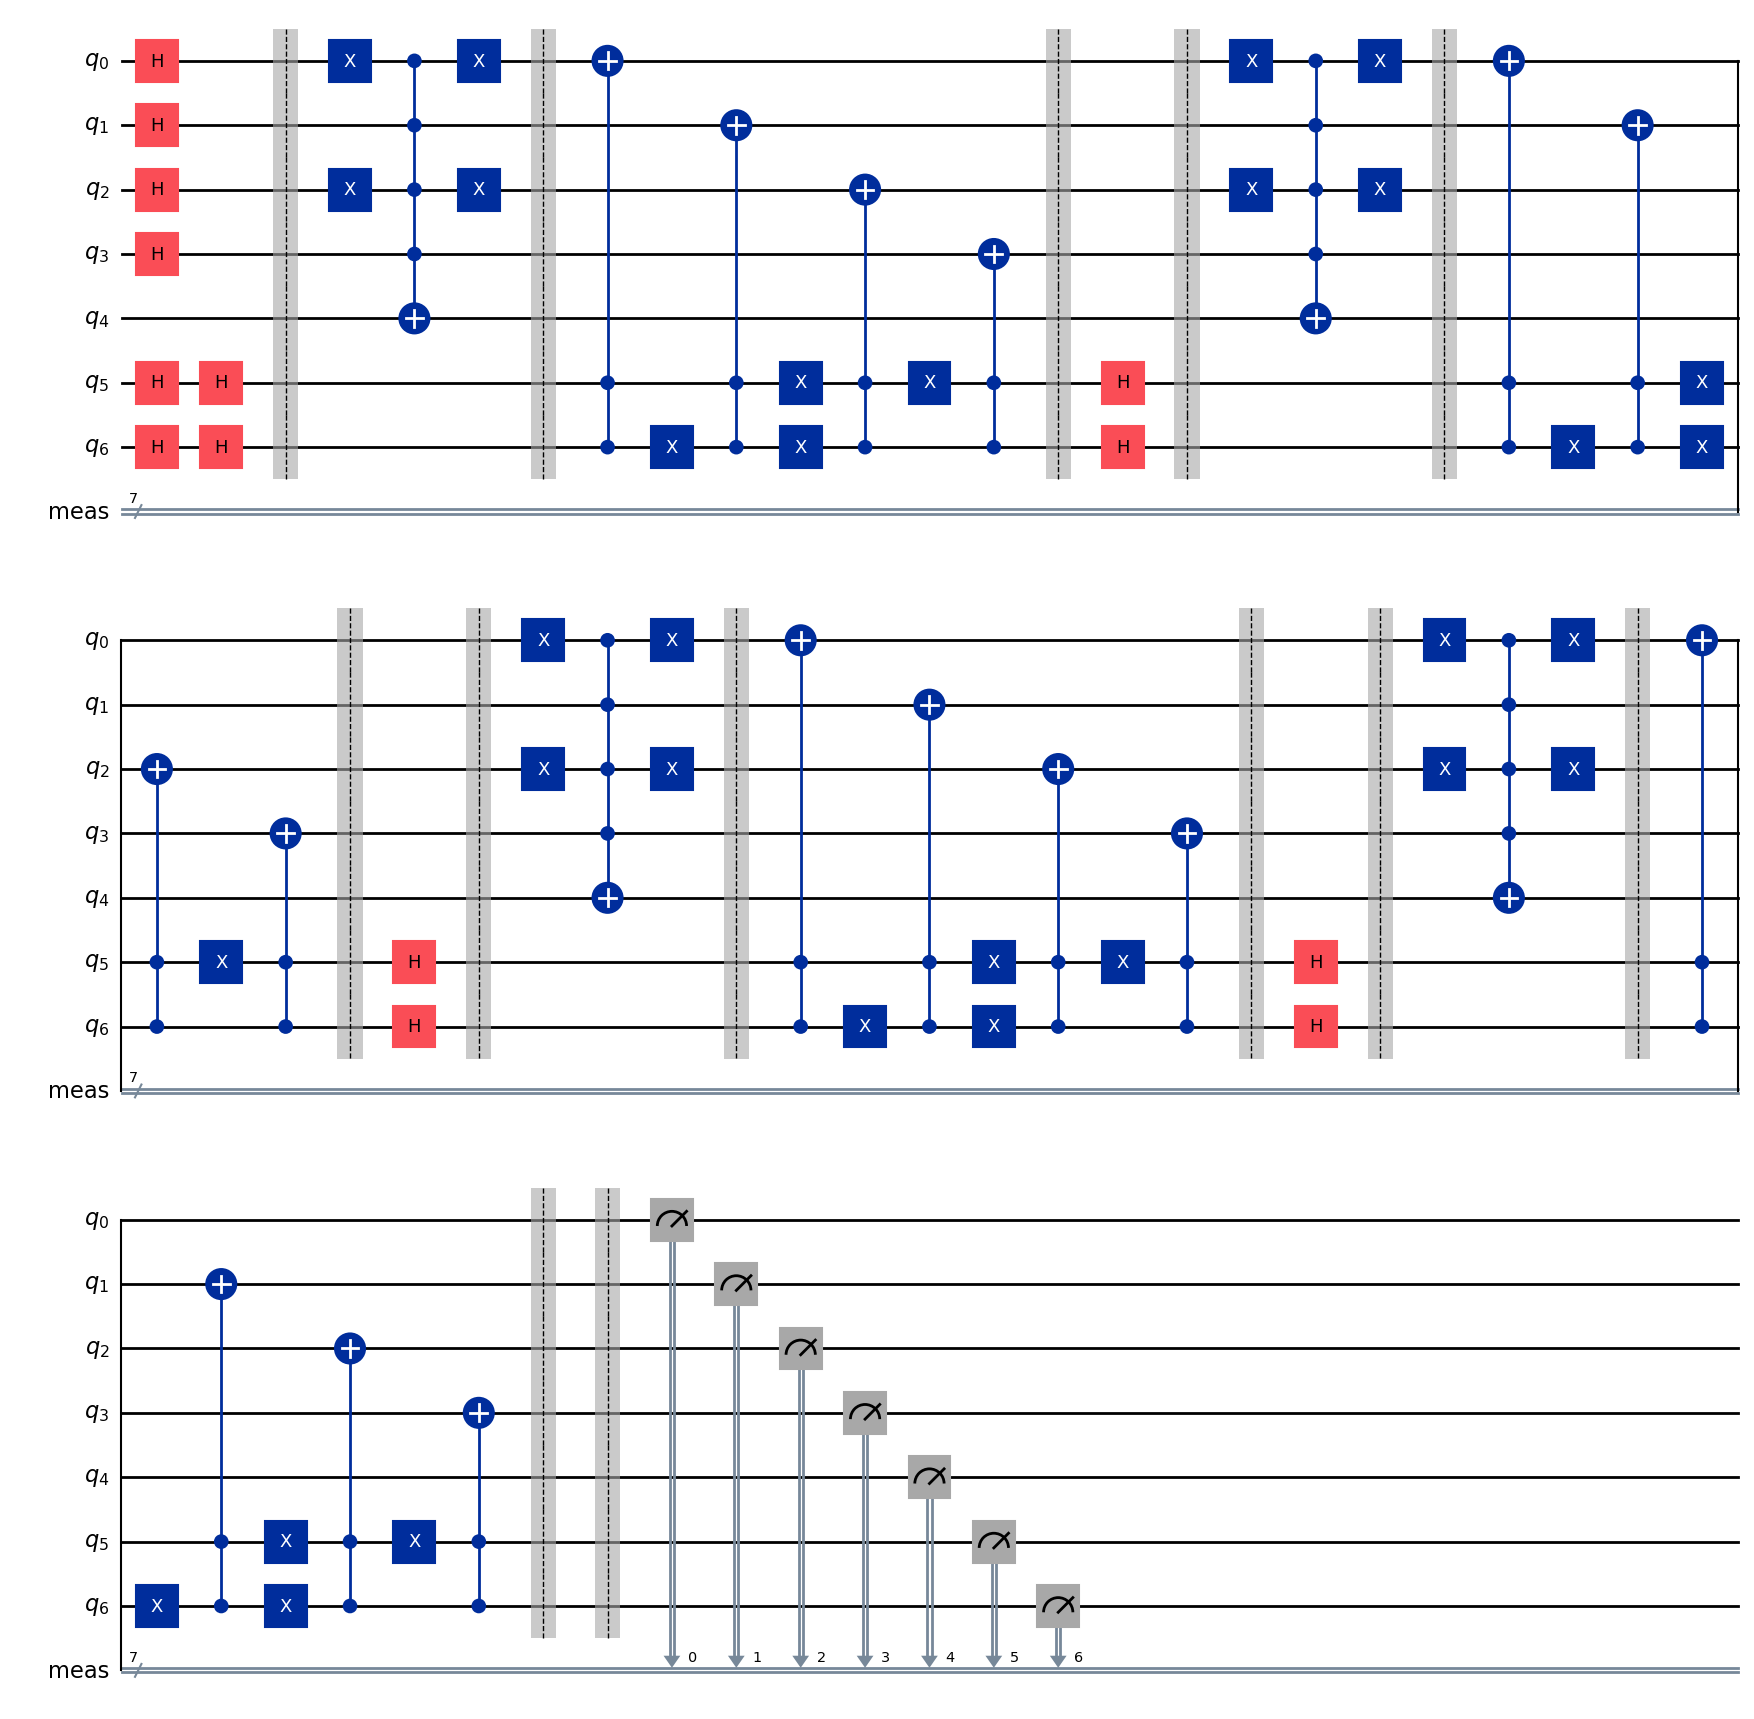

In [41]:
def coin_flip(circuit):
    for qubit in [5, 6]:
        circuit.h(qubit)

def step(circuit):
    circuit.ccx(5, 6, 0)

    circuit.x(6)
    circuit.ccx(5, 6, 1)
    circuit.x(6)
    
    circuit.x(5)
    circuit.ccx(5, 6, 2)
    circuit.x(5)
    
    circuit.ccx(5, 6, 3)

def oracle(circuit):
    circuit.x(0)
    circuit.x(2)
    
    circuit.mcx([0, 1, 2, 3], 4)
    
    circuit.x(0)
    circuit.x(2)

for _ in range(num_steps):
    coin_flip(circuit)
    circuit.barrier()
    oracle(circuit) 
    circuit.barrier()
    step(circuit)
    circuit.barrier()

circuit.measure_all()
circuit.draw('mpl')

In [42]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
compiled_circuit = transpile(circuit, backend)
result = backend.run(compiled_circuit).result()
counts = result.get_counts(circuit)


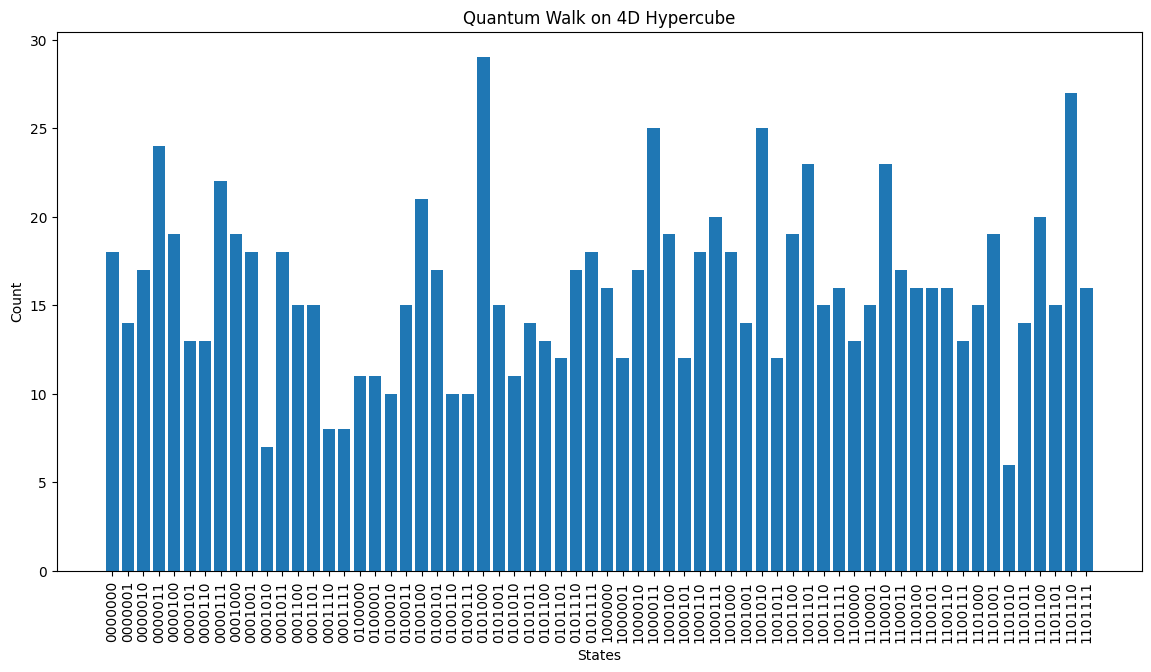

In [43]:
import matplotlib.pyplot as plt

keys = list(counts.keys())
values = list(counts.values())

# Sortowanie wyników dla lepszej czytelności
sorted_indices = sorted(range(len(keys)), key=lambda k: keys[k])
sorted_keys = [keys[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Rysowanie wykresu
plt.figure(figsize=(14, 7))
plt.bar(sorted_keys, sorted_values)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Quantum Walk on 4D Hypercube')
plt.show()

Na osi X mamy różne stany qubitów (połączenie stanów pozycji i monety). Na osi Y mamy liczbę wystąpień każdego stanu w wyniku symulacji.

Wysokie słupki oznaczają stany, które występują często, co sugeruje, że te stany są bardziej prawdopodobne w wyniku kwantowego spaceru. 
​
Zgodnie z teorią, po wykonaniu pi/2 * sqrt(2^(n-1))  kroków, stan kwantowy powinien skoncentrować się na stanie poszukiwanym. W praktyce, ze względu na interferencję kwantową, możemy oczekiwać, że kilka stanów będzie miało wyższe prawdopodobieństwo niż inne